# ARC Discovery Projects — Chief Investigator ranking by author

This notebook loads the Discovery Projects export and ranks authors (Chief Investigators) by the number of projects.

- Input: CSV created by the crawler (defaults to `arc_discovery_projects_2010_2025.csv`).
- Output: Top-ranked CI with counts and optional plot.


Adjust the `INPUT_CSV` path below if needed.


In [1]:
# Configuration
INPUT_CSV = "/Users/a1227750/arc_discovery_projects_2010_2025.csv"
TOP_N = 50  # number of top authors to display



In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

# Load
path = Path(INPUT_CSV)
if not path.exists():
    raise FileNotFoundError(f"Input CSV not found: {path}")

df = pd.read_csv(path)
print(df.shape)
df.head(3)


(10533, 8)


,code,funding_commencement_year,grant_status,funding_at_announcement,funding_current,administering_organisation,chief_investigators,chief_investigators_orcids
0,DP250100164,2025,Active,618568,634722.0,Flinders University,Prof Matthew Fitzpatrick; A/Prof Tomoko Akami;...,0000-0001-6642-2319; 0000-0002-3746-8112; 0000...
1,DP250101453,2025,Active,604943,631911.0,Western Sydney University,Prof Paola Escudero; A/Prof Chloé Diskin-Holdaway,0000-0001-9196-1744
2,DP250103039,2025,Active,824684,857458.0,The University of New South Wales,Prof Mike Letnic; Dr Adrian Fisher; Prof Heloi...,0000-0003-4191-8427; 0000-0002-6903-8053; 0000...


In [3]:
# Parse chief investigators and normalise names
# The CSV uses semicolon-separated names in `chief_investigators`

def split_ci_names(names: str):
    if pd.isna(names) or not str(names).strip():
        return []
    # split by semicolon; strip whitespace
    return [n.strip() for n in str(names).split(";") if n.strip()]

ci_series = df["chief_investigators"].apply(split_ci_names)

authors = (
    pd.Series([name for sub in ci_series for name in sub], name="author")
    .pipe(lambda s: s[s.notna() & (s.str.strip() != "")])
)

ranked = (
    authors.value_counts()
    .rename_axis("author")
    .reset_index(name="num_projects")
)

ranked.head(10)


,author,num_projects
0,Prof Jie Bao,10
1,Prof Martina Stenzel,10
2,Prof Spencer Williams,9
3,Prof Brendan Kennedy,9
4,Prof Cameron Kepert,9
5,Prof Carla Sgro,9
6,Prof Gavan McNally,9
7,Prof Chongmin Song,9
8,Prof Brett Hayes,9
9,Prof Nasser Khalili,9


In [4]:
# Display top N authors
ranked.head(TOP_N)


,author,num_projects
0,Prof Jie Bao,10
1,Prof Martina Stenzel,10
2,Prof Spencer Williams,9
3,Prof Brendan Kennedy,9
4,Prof Cameron Kepert,9
5,Prof Carla Sgro,9
6,Prof Gavan McNally,9
7,Prof Chongmin Song,9
8,Prof Brett Hayes,9
9,Prof Nasser Khalili,9


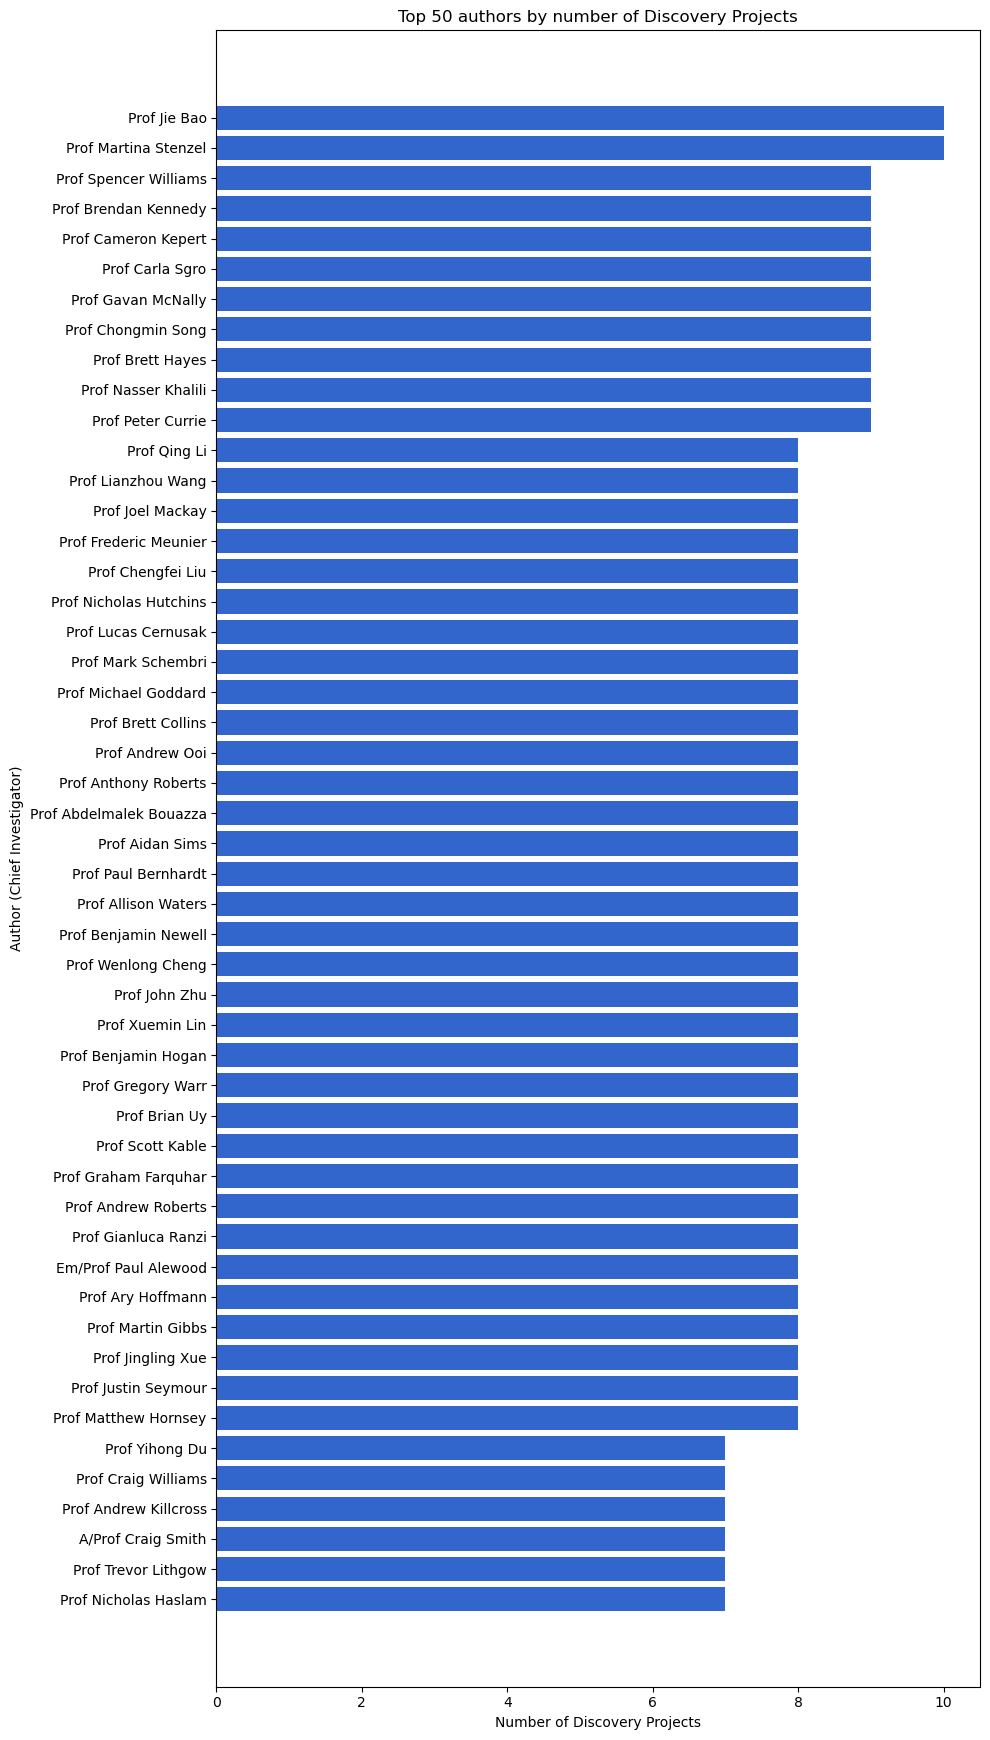

In [6]:
# Optional: plot top 30 authors
import matplotlib.pyplot as plt

n_plot = min(50, TOP_N)
fig, ax = plt.subplots(figsize=(10, max(6, n_plot * 0.35)))
plot_df = ranked.head(n_plot).iloc[::-1]
ax.barh(plot_df["author"], plot_df["num_projects"], color="#3366cc")
ax.set_xlabel("Number of Discovery Projects")
ax.set_ylabel("Author (Chief Investigator)")
ax.set_title(f"Top {n_plot} authors by number of Discovery Projects")
plt.tight_layout()
plt.show()
